<a href="https://colab.research.google.com/github/GladwelWanjau/Week-14-IP/blob/main/Week_14_Part_1_and_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understanding the Problem

Build models that will inform on relevant marketing strategies that will result in the highest no. of sales (total price including tax) for the Marketing Department at CarreFour Kenya

Understanding the Context
# New Section
As a Data analyst at Carrefour Kenya and are currently undertaking a project that will inform the marketing department on the most relevant marketing strategies that will result in the highest no. of sales (total price including tax). Your project has been divided into four parts where you'll explore a recent marketing dataset by performing various unsupervised learning techniques and later providing recommendations based on your insights.

# Data Relevance
The availed data had the following columns:

Categorical Variables:-

1. Branch

2. Customer Type

3. Gender

4. Product Line

5. Payment



In the Numeric variables:-



1. Tax

2. Total

3. Cogs

4. Gross_Income


In [22]:
!jupyter-kernelspec list

Available kernels:
  ir         /usr/local/share/jupyter/kernels/ir
  python2    /usr/local/share/jupyter/kernels/python2
  python3    /usr/local/share/jupyter/kernels/python3
  swift      /usr/local/share/jupyter/kernels/swift


In [23]:
# activating R magic
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [24]:
%%R
Sales_Dataset<-read.csv("/content/Supermarket_Dataset_1 - Sales Data.csv")
head(Sales_Dataset)

   Invoice.ID Branch Customer.type Gender           Product.line Unit.price
1 750-67-8428      A        Member Female      Health and beauty      74.69
2 226-31-3081      C        Normal Female Electronic accessories      15.28
3 631-41-3108      A        Normal   Male     Home and lifestyle      46.33
4 123-19-1176      A        Member   Male      Health and beauty      58.22
5 373-73-7910      A        Normal   Male      Sports and travel      86.31
6 699-14-3026      C        Normal   Male Electronic accessories      85.39
  Quantity     Tax      Date  Time     Payment   cogs gross.margin.percentage
1        7 26.1415  1/5/2019 13:08     Ewallet 522.83                4.761905
2        5  3.8200  3/8/2019 10:29        Cash  76.40                4.761905
3        7 16.2155  3/3/2019 13:23 Credit card 324.31                4.761905
4        8 23.2880 1/27/2019 20:33     Ewallet 465.76                4.761905
5        7 30.2085  2/8/2019 10:37     Ewallet 604.17                4.761905


# Data Loading and Cleaning

In [25]:
%%R
#Checking the Structure of the data
str(Sales_Dataset)

'data.frame':	1000 obs. of  16 variables:
 $ Invoice.ID             : chr  "750-67-8428" "226-31-3081" "631-41-3108" "123-19-1176" ...
 $ Branch                 : chr  "A" "C" "A" "A" ...
 $ Customer.type          : chr  "Member" "Normal" "Normal" "Member" ...
 $ Gender                 : chr  "Female" "Female" "Male" "Male" ...
 $ Product.line           : chr  "Health and beauty" "Electronic accessories" "Home and lifestyle" "Health and beauty" ...
 $ Unit.price             : num  74.7 15.3 46.3 58.2 86.3 ...
 $ Quantity               : int  7 5 7 8 7 7 6 10 2 3 ...
 $ Tax                    : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Date                   : chr  "1/5/2019" "3/8/2019" "3/3/2019" "1/27/2019" ...
 $ Time                   : chr  "13:08" "10:29" "13:23" "20:33" ...
 $ Payment                : chr  "Ewallet" "Cash" "Credit card" "Ewallet" ...
 $ cogs                   : num  522.8 76.4 324.3 465.8 604.2 ...
 $ gross.margin.percentage: num  4.76 4.76 4.76 4.76 4.76 ...
 $ g

In [26]:
%%R
#Dropping the invoice column as it is irrelevant in our analysis
df <- Sales_Dataset[,-1]

head(df)



  Branch Customer.type Gender           Product.line Unit.price Quantity
1      A        Member Female      Health and beauty      74.69        7
2      C        Normal Female Electronic accessories      15.28        5
3      A        Normal   Male     Home and lifestyle      46.33        7
4      A        Member   Male      Health and beauty      58.22        8
5      A        Normal   Male      Sports and travel      86.31        7
6      C        Normal   Male Electronic accessories      85.39        7
      Tax      Date  Time     Payment   cogs gross.margin.percentage
1 26.1415  1/5/2019 13:08     Ewallet 522.83                4.761905
2  3.8200  3/8/2019 10:29        Cash  76.40                4.761905
3 16.2155  3/3/2019 13:23 Credit card 324.31                4.761905
4 23.2880 1/27/2019 20:33     Ewallet 465.76                4.761905
5 30.2085  2/8/2019 10:37     Ewallet 604.17                4.761905
6 29.8865 3/25/2019 18:30     Ewallet 597.73                4.761905
  gros

In [27]:
%%R
#There is need to standardize the naming of the columns.
lower <- function(x) {

colnames(x) <- tolower(colnames(x))

x

}



df <- lower(df)



head(df)


  branch customer.type gender           product.line unit.price quantity
1      A        Member Female      Health and beauty      74.69        7
2      C        Normal Female Electronic accessories      15.28        5
3      A        Normal   Male     Home and lifestyle      46.33        7
4      A        Member   Male      Health and beauty      58.22        8
5      A        Normal   Male      Sports and travel      86.31        7
6      C        Normal   Male Electronic accessories      85.39        7
      tax      date  time     payment   cogs gross.margin.percentage
1 26.1415  1/5/2019 13:08     Ewallet 522.83                4.761905
2  3.8200  3/8/2019 10:29        Cash  76.40                4.761905
3 16.2155  3/3/2019 13:23 Credit card 324.31                4.761905
4 23.2880 1/27/2019 20:33     Ewallet 465.76                4.761905
5 30.2085  2/8/2019 10:37     Ewallet 604.17                4.761905
6 29.8865 3/25/2019 18:30     Ewallet 597.73                4.761905
  gros

In [28]:
#Checking the frequency of the categorical variables
%%R
print(table(Sales_Dataset$Branch))
print(table(Sales_Dataset$Customer.type))
print(table(Sales_Dataset$Gender))
print(table(Sales_Dataset$Product.line))
print(table(Sales_Dataset$Payment))




  A   B   C 
340 332 328 

Member Normal 
   501    499 

Female   Male 
   501    499 

Electronic accessories    Fashion accessories     Food and beverages 
                   170                    178                    174 
     Health and beauty     Home and lifestyle      Sports and travel 
                   152                    160                    166 

       Cash Credit card     Ewallet 
        344         311         345 


In [29]:
#Converting Categorical columns into factors
%%R
library(dplyr)
df1 <- mutate_at(df, vars(Branch, Customer.type,Gender,Product.line,Payment), as.factor)
str(df1)


R[write to console]: Error: 
R[write to console]: 
R[write to console]: Can't subset columns that don't exist.
✖ Column `Branch` doesn't exist.
R[write to console]: 
R[write to console]: 

R[write to console]: Backtrace:
     █
  1. ├─(function (expr, envir = parent.frame(), enclos = if (is.list(envir) || ...
  2. │ └─(function (expr, envir = parent.frame(), enclos = if (is.list(envir) || ...
  3. ├─base::withVisible(...)
  4. └─dplyr::mutate_at(...)
  5.   └─dplyr:::manip_at(...)
  6.     └─dplyr:::tbl_at_syms(.tbl, .vars, .include_group_vars = .include_group_vars)
  7.       └─dplyr:::tbl_at_vars(tbl, vars, .include_group_vars = .include_group_vars)
  8.         └─tidyselect::vars_select(tibble_vars, !!!vars)
  9.           └─tidyselect:::eval_select_impl(...)
 10.             ├─tidyselect:::with_subscript_errors(...)
 11.             │ ├─base::tryCatch(...)
 12.             │ │ └─base:::tryCatchList(expr, classes, parentenv, handlers)
 13.             │ │   └─base:::tryCatchOne(expr


Error: Can't subset columns that don't exist.
✖ Column `Branch` doesn't exist.


In [36]:
# checking for missing data
%%R
colSums(is.na(df))
#There are no missing values

                 branch           customer.type                  gender 
                      0                       0                       0 
           product.line              unit.price                quantity 
                      0                       0                       0 
                    tax                    date                    time 
                      0                       0                       0 
                payment                    cogs gross.margin.percentage 
                      0                       0                       0 
           gross.income                  rating                   total 
                      0                       0                       0 


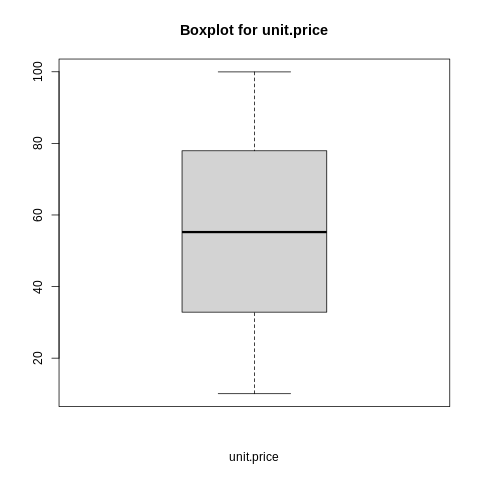

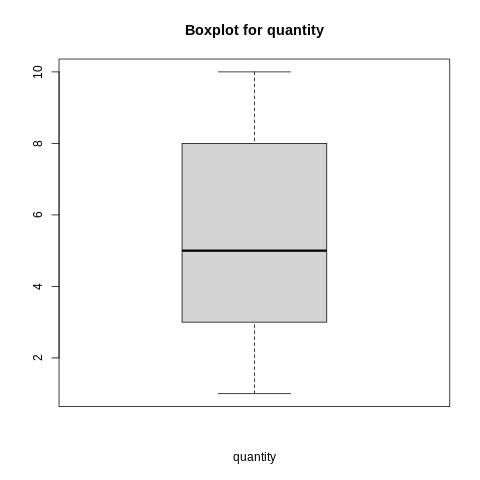

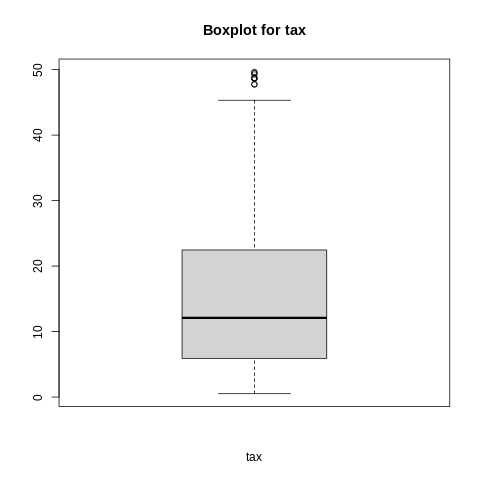

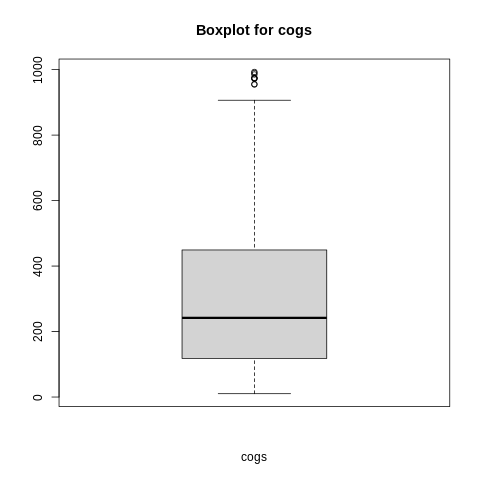

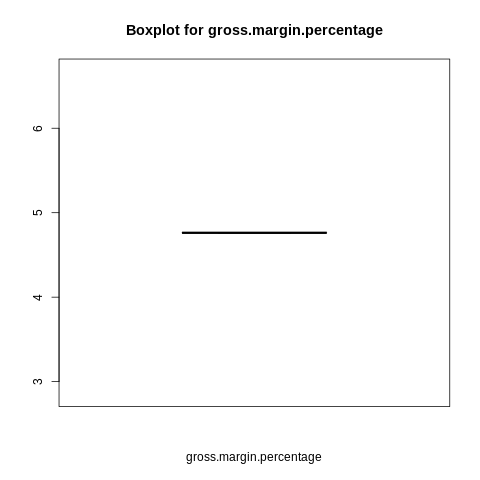

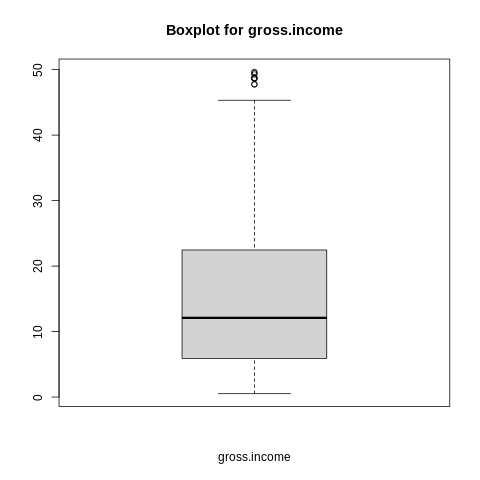

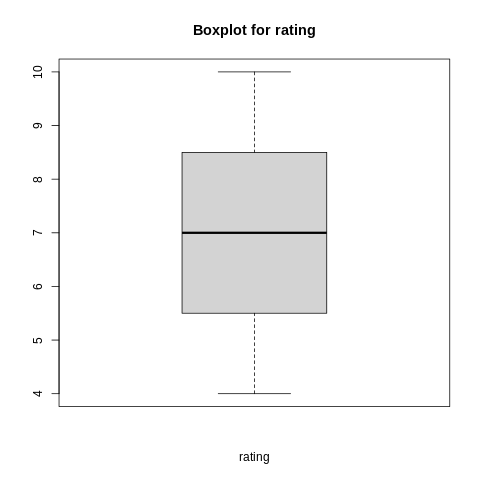

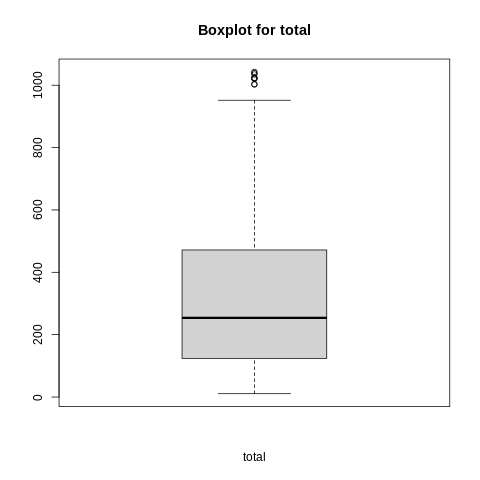

In [37]:
# Check for outliers
%%R
cols <- df[, c(5,6,7,11,12,13,14,15)]

outliers = function(x){

for(i in colnames(x)){

boxplot(df[[i]], xlab=i, main=paste0("Boxplot for ",i))

}

}
outliers(cols)
#There are no outliers in the data



In [ ]:
#To deal with the outliers we will replace them with the 95th and 5th percentile

%%R
outlier_replace <- function(x){

qnt <- quantile(x, probs=c(.25, .75), na.rm = T)

caps <- quantile(x, probs=c(.05, .95), na.rm = T)

H <- 1.5 * IQR(x, na.rm = T)

x[x < (qnt[1] - H)] <- caps[1]

x[x > (qnt[2] + H)] <- caps[2]

return(x)
}

df1$gross.income <- outlier_replace(df1$gross.income)

df1$total <- outlier_replace(df1$total)

df1$tax <-outlier_replace(df1$tax)

df1$cogs <- outlier_replace(df1$cogs)




outliers(cols)


# Univariate Analysis

# 1.Numeric Data

In [ ]:
%%R
library(Hmisc)

describe(num_col)


In [ ]:
%%R
histogram = function(x){

for(i in colnames(x)){

hist(df[[i]], breaks = 10,main =i,xlab = i,col = "dodgerblue")

}

}



histogram(num_col)


# 2. Categorical

In [ ]:
library(ggplot2)

In [ ]:
# Customer Type
%%R
customer_type <- ggplot(df ,aes(x=customer.type , fill=customer.type)) + geom_bar() + labs(title = "Distribution of the Customer Types", x="Customer Type")

customer_type +scale_fill_discrete(name = "Customer Type") 


In [ ]:
%%R
bran <- ggplot(df, aes(x=branch, fill=branch)) + geom_bar()+labs(title = "Distribution of Branches", x="Branches")+scale_fill_discrete(name = "Branch") 

bran


In [ ]:
%%R
gender1 <- ggplot(df, aes(x=gender, fill=gender)) + geom_bar()+labs(title = "Distribution of Gender", x="Gender")+scale_fill_discrete(name = "Gender") 

gender1


In [ ]:
# Types Product Line
%%R
product_line <- ggplot(df,aes(x=product.line, fill=product.line))+ geom_bar()+ labs(title = "Distribution of Product Line", x="Product Line")+ scale_fill_discrete(name = "Product Line")

product_line + theme(axis.title.x=element_blank(),

axis.text.x=element_blank(),

axis.ticks.x=element_blank())


In [ ]:
# Types Payments
%%R
payment_meth <- ggplot(df, aes(x=payment, fill=payment)) + geom_bar()+labs(title = "Distribution of Payments", x="Payment")+scale_fill_discrete(name = "Payment") 

payment_meth


In [ ]:
# Which Product line was bought more in terms of quantity per branch
%%R
product_line1 <- ggplot(df,aes(x=product.line,y=quantity,fill=product.line))+geom_bar(stat = "identity")+ facet_wrap(~branch, scales = "free") + labs(title = "Total Quantity of each Product Line", subtitle = "[per Branch]",x="Product Line", y="Total Quantity") + scale_fill_discrete(name = "Product Line") + theme(axis.title.x=element_blank(),

axis.text.x=element_blank(),

axis.ticks.x=element_blank())
product_line1


In [ ]:
# Customer Type per Branch
%%R
customer_type1 <- ggplot(df, aes(x=branch, fill=customer.type)) + geom_bar(position = "dodge")+labs(title = "Distribution of Customer Type per Branch", x="Payment")+scale_fill_discrete(name = " Customer Type") 

customer_type1


In [ ]:
# Gender per Branch
%%R
gender2 <- ggplot(df, aes(x=branch, fill=gender)) + geom_bar(position = "dodge")+labs(title = "Distribution of Gender per Branch", x="Branch")+scale_fill_discrete(name = "Gender") 

gender2


In [ ]:
# Mode of Payment per Branch
%%R
payment_meth1 <- ggplot(df, aes(x=branch, fill=payment)) + geom_bar(position = "dodge")+labs(title = "Distribution of Payment Mode per Branch", x="Branch")+scale_fill_discrete(name = "Payment") 

payment_meth1


In [ ]:
# Customer Type and Mode of Payment
%%R
customer_type2 <- ggplot(df, aes(x=customer.type, fill=payment)) + geom_bar(position = "dodge")+labs(title = "Customer Type and Mode of Payment", x="Customer Type")+scale_fill_discrete(name = "Mode of Payment") 

customer_type2


In [ ]:
# Customer Type and Product Line
%%R
product_line2 <- ggplot(df, aes(x=product.line, fill=customer.type)) + geom_bar(position = "dodge")+labs(title = "Distribution of Product Line for Each Customer Type", x="Product Line")+scale_fill_discrete(name = "Customer Type") 

product_line2 +theme(axis.text.x = element_text(angle = 30, hjust=0.8))



In [ ]:
# Product Line vs Gender
%%R
product_line3 <- ggplot(df, aes(x=product.line, fill=gender)) + geom_bar(position = "dodge")+labs(title = "Distribution of Product Line in Each Gender", x="Product Line")+scale_fill_discrete(name = "Gender") 

product_line3 +theme(axis.text.x = element_text(angle = 30, hjust=0.8))


# Bivariate

In [ ]:
# Total Sales for Each Product Line
%%R
by_sale <- df %>%

group_by(product.line) %>%

summarise(total = sum(total))


In [ ]:
# Label Encode Categorical Variables
%%R
encode_ordinal <- function(x, order = unique(x)) {

x <- as.numeric(factor(x, levels = order, exclude = NULL))

x

}

table(df$branch, encode_ordinal(df$branch))

table(df$customer.type,encode_ordinal(df$customer.type))

table(df$gender, encode_ordinal(df$gender))

table(df$product.line, encode_ordinal(df$product.line))

table(df$payment, encode_ordinal(df$payment))



df$branch_enc <- encode_ordinal(df$branch)

df$customer.type_enc <- encode_ordinal(df$customer.type)

df$gender_enc <- encode_ordinal(df$gender)

df$product.line_enc <- encode_ordinal(df$product.line)

df$payment_enc <- encode_ordinal(df$payment)



head(df)

```


In [ ]:
# the correlation matrix
%%R
feat <- df[, c(-1,-2,-3,-4,-8,-9,-10,-12)]

#head(feat)



correlation_matrix <- cor(feat)

library(corrplot)

corr_data <- as.data.frame(correlation_matrix)

corr_data



corr <- corrplot(correlation_matrix, method = "shade",order = "hclust", col=colorRampPalette(c("yellow","green","navyblue"))(100), addgrid.col="gray", tl.col = "black", tl.cex = 0.7,tl.srt = 45)


In [ ]:
%%R
by_rate <- df %>%

group_by(branch) %>%

summarise(rate = mean(rating))



rate <- ggplot(by_rate, aes(x=branch, y= rate, fill=branch))+geom_bar(stat = "identity")+ labs(title = "Average Rating Per Branch", x="Branch",y="Average Rating")

rate + scale_fill_brewer(palette="Set1")+theme(legend.position = "none") 


In [ ]:
# Product Line with Highest Gross Income
%%R
by_gross <- df %>%

group_by(product.line) %>%

summarise(gross = sum(gross.income))


In [ ]:
%%R
gross_inc <- ggplot(by_gross, aes(x=product.line, y= gross, fill=product.line))+geom_bar(stat = "identity")+ labs(title = "Product Line vs Gross Income", x="Product Line",y="Total Gross Income")

gross_inc + scale_fill_brewer(name="Product Line",palette="Set1")+theme(axis.title.x=element_blank(),

axis.text.x=element_blank(),

axis.ticks.x=element_blank())



In [ ]:
%%R
total_sale <- ggplot(by_sale, aes(x=product.line, y= total, fill=product.line))+geom_bar(stat = "identity")+ labs(title = "Total Sales from Each Product Line", x="Product Line",y="Total Sales")

total_sale + scale_fill_brewer(name="Product Line",palette="Set1")+theme(axis.title.x=element_blank(),

axis.text.x=element_blank(),

axis.ticks.x=element_blank())


In [ ]:
%%R
by_cust <- df %>%

group_by(customer.type) %>%

summarise(gross = sum(gross.income))



cust_type <- ggplot(by_cust, aes(x=customer.type, y= gross, fill=customer.type))+geom_bar(stat = "identity")+ labs(title = " Total Gross Income per Customer Type", x="Customer Type",y="Total Gross Income")

cust_type + scale_fill_brewer( name= "Customer Type",palette="Set1")+theme(axis.title.x=element_blank(),

axis.text.x=element_blank(),

axis.ticks.x=element_blank())


In [ ]:
# Branch with the Highest Gross Income
%%R

by_branch <- df %>%

group_by(branch) %>%

summarise(gross = sum(gross.income))



branch_gross <- ggplot(by_branch, aes(x=branch, y= gross, fill=branch))+geom_bar(stat = "identity")+ labs(title = " Total Gross Income per Branch", x="Branch",y="Total Gross Income")

branch_gross + scale_fill_brewer(name="Branch",palette="Set1")+theme(

axis.title.x=element_blank(),

axis.text.x=element_blank(),

axis.ticks.x=element_blank())


In [ ]:
# Monthly Gross Income

%%R

sales_new$date <- as.Date(df$date, format = "%m/%d/%Y")



by_date <- df %>%

group_by(date, branch) %>%

summarise(gross = sum(gross.income))





month_gross <- ggplot(by_date, aes(x=date, y=gross)) +geom_line(color="blue") + labs(title = " Monthly Total Gross Income per Branch", x="",y="Total Gross Income")+facet_wrap(~branch, scales = "free_x", ncol=2)

month_gross


### Scatter Plots

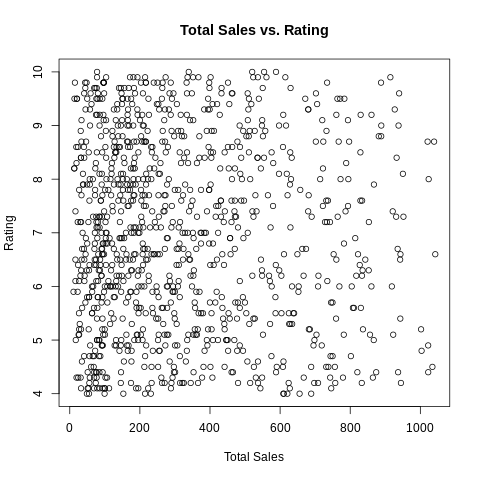

In [39]:
%%R
plot(df$total, df$rating, main = "Total Sales vs. Rating", xlab = "Total Sales", ylab = "Rating")




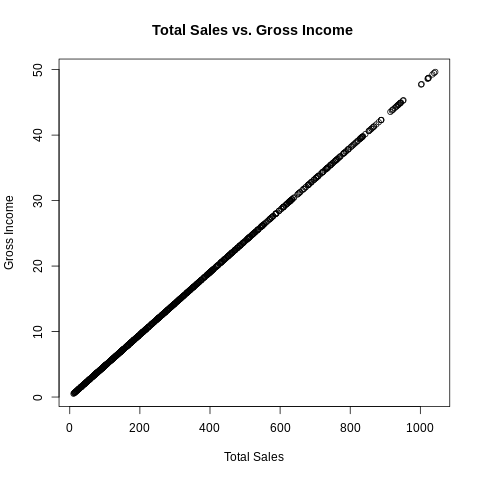

In [40]:
%%R
plot(df$total, df$gross.income, main = "Total Sales vs. Gross Income ", xlab = "Total Sales", ylab = "Gross Income")



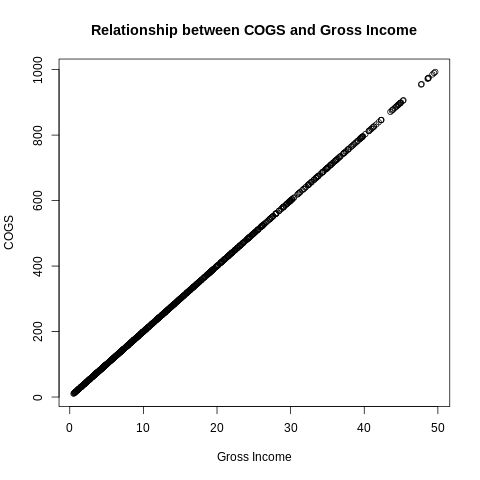

In [41]:
%%R
plot(df$gross.income, df$cogs, main = "Relationship between COGS and Gross Income", xlab="Gross Income", ylab="COGS")


# Dimension Reduction

In [43]:
%%R
predictors <- df[, c(-1,-2,-3,-4,-8,-9,-10,-12,-15)]



sales.pca <- prcomp(predictors, scale. = TRUE, center = TRUE)

summary(sales.pca)


Importance of components:
                          PC1    PC2    PC3    PC4       PC5       PC6
Standard deviation     1.9817 1.0002 0.9939 0.2909 2.293e-16 1.124e-16
Proportion of Variance 0.6545 0.1667 0.1646 0.0141 0.000e+00 0.000e+00
Cumulative Proportion  0.6545 0.8213 0.9859 1.0000 1.000e+00 1.000e+00


In [45]:
%%R
label <- df[, "total"]



library(ggbiplot)

ggbiplot(sales.pca, obs.scale = 1.2,var.scale=1.3)

ggbiplot(sales.pca, choices = c(3,4) ,obs.scale = 1.2, var.scale = 1.3)



R[write to console]: Error in library(ggbiplot) : there is no package called ‘ggbiplot’
Calls: <Anonymous> -> <Anonymous> -> withVisible -> library




Error in library(ggbiplot) : there is no package called ‘ggbiplot’
Calls: <Anonymous> -> <Anonymous> -> withVisible -> library


## Feature Selection

### 1. Filter Method

In [46]:
## Feature Selection

%%R
library(caret)



correlation = cor(predictors)



highly <- findCorrelation(correlation, cutoff = 0.75)

# highly correlated variables

names(predictors[,highly])



# Dataset without the Highly Correlated

sales_new1 <- predictors[-highly]



#Plot

par(mfrow = c(1, 2))

corrplot(correlation, order = "hclust",tl.col = "black", tl.cex = 0.7)

corrplot(cor(sales_new1), order = "hclust",tl.col = "black", tl.cex = 0.7)


R[write to console]: Error in library(caret) : there is no package called ‘caret’
Calls: <Anonymous> -> <Anonymous> -> withVisible -> library




Error in library(caret) : there is no package called ‘caret’
Calls: <Anonymous> -> <Anonymous> -> withVisible -> library


### 2.Wrapper Method

In [ ]:
library(clustvarsel)

library(mclust)

%%R

# perfectly correlated features



predictors_corr <- predictors[,c(-3,-4,-5)]



out = clustvarsel(predictors_corr, G=1:9)

out


In [ ]:
# Features selected
%%R
data <- predictors_corr[,out$subset]

head(data)


In [ ]:
#Ranking of Features
%%R
library(FSelector)

head(df)



predictors1 <- df[, c(-1,-2,-3,-4,-7,-8,-9,-10,-11,-12,-13)]



Scores <- linear.correlation(total~., predictors1)

Scores



In [ ]:
#Final Features
%%R
Subset <- cutoff.k(Scores, 5)

as.data.frame(Subset)


# Feature Selection

In Filter Methods with a cutoff at 0.7, the variables accepted were:



1. Branch

2. Customer Type

3. Gender

4. Product Line

5. Payment

6. Unit Price

7. Quantity

8. Gross Income

9. Rating





Excluding the Total column for it the Label column



The Wrapper method selected, it excluded the perfectly correlated features and it returned



1. Quantity

2. Payment



The Feature Ranking while excluding the perfectly correlated features were:



1. Quantity

2. Unit Price

3. Gender

4. Product Line

5. Rating
